In [2]:
import pandas as pd
import numpy as np
from scipy import spatial
from scipy.spatial import KDTree
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip '/content/drive/MyDrive/CSC501A2/out.zip'

Archive:  /content/drive/MyDrive/CSC501A2/out.zip
  inflating: out.csv                 


In [52]:
weather = pd.read_csv('/content/drive/MyDrive/CSC501A2/weather.csv', parse_dates=[1],low_memory=False)

In [53]:
#using subset of columns
df1 = weather.loc[:,['valid','sknt']]

#converting valid column to datetime
df1['valid'] = pd.to_datetime(df1['valid'])

#replacing null values 'M' with 0
df1['sknt'].replace('M', 0, inplace = True)

#converting type of wind speed to numeric
df1['sknt'] = pd.to_numeric(df1['sknt'])

In [54]:
#setting valid column as index of file
df1.set_index('valid',inplace=True)

#calculating average of wind speed over each date
sampled_data = df1.resample('D').mean()

Text(0, 0.5, 'Average Wind Speed')

<Figure size 864x864 with 0 Axes>

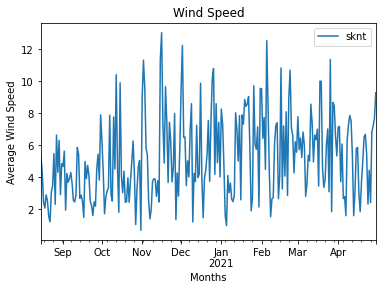

In [63]:
plt.figure(figsize=(12,12))
sampled_data.plot()
plt.title('Wind Speed')
plt.xlabel('Months')
plt.ylabel('Average Wind Speed')

In [64]:
sorted_data = sampled_data.sort_values(by=['sknt'], ascending=False)

Most Windy day of the dataset is November 16, 2020

In [65]:
sorted_data

,sknt
valid,
2020-11-16,13.040000
2021-02-05,12.535168
2020-12-02,12.243750
2020-11-15,11.423077
2021-03-26,11.364217
...,...
2020-08-22,1.224359
2020-12-10,1.220000
2020-10-27,1.056548


In [4]:
# Read Flight Data
df_flight = pd.read_csv('out.csv', low_memory=False)
#df_flight = pd.read_csv('7days2/raw_data/03-14-21_adsb/1.csv', low_memory=False)
df_flight['ID'] = df_flight['ID'].astype(int)
df_flight.drop(df_flight[(df_flight['Speed'].isnull())].index, inplace=True)
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282419 entries, 0 to 9330849
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   Time      object 
 2   Date      object 
 3   Altitude  int64  
 4   Speed     float64
 5   Heading   float64
 6   Lat       float64
 7   Lon       float64
 8   Age       float64
 9   Range     float64
 10  Bearing   float64
 11  Tail      object 
 12  Metar     object 
dtypes: float64(7), int64(2), object(4)
memory usage: 991.5+ MB


In [5]:
# Converting Date time to seconds - numerical for KDTree
custom_date_time = datetime(2020, 7, 1, 0, 0, 0, 0)
df_flight['DateTime'] = df_flight['Date'] + ' ' + df_flight['Time']
df_flight['DateTime'] = df_flight['DateTime'].astype('datetime64')

In [6]:
df_flight['MicroSeconds'] = (df_flight['DateTime'] - custom_date_time).dt.microseconds

In [7]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282419 entries, 0 to 9330849
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   ID            int64         
 1   Time          object        
 2   Date          object        
 3   Altitude      int64         
 4   Speed         float64       
 5   Heading       float64       
 6   Lat           float64       
 7   Lon           float64       
 8   Age           float64       
 9   Range         float64       
 10  Bearing       float64       
 11  Tail          object        
 12  Metar         object        
 13  DateTime      datetime64[ns]
 14  MicroSeconds  int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(4)
memory usage: 1.1+ GB


In [8]:
df_flight.head(100)

,ID,Time,Date,Altitude,Speed,Heading,Lat,Lon,Age,Range,Bearing,Tail,Metar,DateTime,MicroSeconds
0,11230936,23:10:39.838,01/19/2021,38000,364.0,304.0,40.472626,-80.338870,2.898249,47.248304,-135.717486,SWA1456,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.838,838000
1,10672426,23:10:39.780,01/19/2021,36075,343.0,304.0,40.359394,-80.113365,2.898340,48.490544,-163.356299,N283AK,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.780,780000
2,12583405,23:10:39.898,01/19/2021,43000,392.0,186.0,40.625200,-80.247620,2.898398,30.343740,-123.874832,ASP489,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.898,898000
3,11230936,23:10:39.838,01/19/2021,38000,364.0,304.0,40.472626,-80.338870,3.899393,47.248304,-135.717486,SWA1456,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.838,838000
4,10672426,23:10:39.780,01/19/2021,36075,343.0,304.0,40.359394,-80.113365,3.899472,48.490544,-163.356299,N283AK,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.780,780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12583405,23:10:39.898,01/19/2021,43000,392.0,186.0,40.625200,-80.247620,42.904879,30.343740,-123.874832,ASP489,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.898,898000
96,11230936,23:10:39.838,01/19/2021,38000,364.0,304.0,40.472626,-80.338870,44.704680,47.248304,-135.717486,SWA1456,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.838,838000
97,10672426,23:10:39.780,01/19/2021,36075,343.0,304.0,40.359394,-80.113365,44.704758,48.490544,-163.356299,N283AK,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.780,780000
98,12583405,23:10:39.898,01/19/2021,43000,392.0,186.0,40.625200,-80.247620,44.704816,30.343740,-123.874832,ASP489,KBTP 192310Z AUTO 22005KT 10SM OVC090 01/M06 A...,2021-01-19 23:10:39.898,898000


In [20]:
df_month = df_flight.loc[(df_flight['Date'] >= '03/01/2021') & (df_flight['Date'] <= '03/31/2021')]
df_month1 = df_month[['ID','Altitude','Speed','Heading','Lat','Lon','Age','Range','Bearing','MicroSeconds']].reset_index(drop=True)

In [24]:
df_month1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121618 entries, 0 to 2121617
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   Altitude      int64  
 2   Speed         float64
 3   Heading       float64
 4   Lat           float64
 5   Lon           float64
 6   Age           float64
 7   Range         float64
 8   Bearing       float64
 9   MicroSeconds  int64  
dtypes: float64(7), int64(3)
memory usage: 161.9 MB


In [21]:
import sys
print(sys.getrecursionlimit())

30000


In [22]:
sys.setrecursionlimit(30000)

In [23]:
%time tree = KDTree(df_month1.values)

CPU times: user 1min 23s, sys: 4.66 s, total: 1min 27s
Wall time: 1min 28s


Finding flights flying on the most windy day

In [25]:
df2 = df_flight.loc[df_flight['Date'] == '11/16/2020']

In [26]:
df2 = df2[['ID','Altitude','Speed','Heading','Lat','Lon','Age','Range','Bearing','MicroSeconds']].reset_index(drop=True)
df2.head()

,ID,Altitude,Speed,Heading,Lat,Lon,Age,Range,Bearing,MicroSeconds
0,11120723,8000,154.0,258.0,40.2456,-79.39029,0.721669,75.78152,141.07579,794000
1,11120723,8000,154.0,258.0,40.2456,-79.39029,3.357299,75.78152,141.07579,794000
2,11120723,8000,154.0,258.0,40.2456,-79.39029,5.355903,75.78152,141.07579,794000
3,11120723,8000,154.0,258.0,40.2456,-79.39029,7.357845,75.78152,141.07579,794000
4,11120723,8000,154.0,258.0,40.2456,-79.39029,9.358531,75.78152,141.07579,794000


In [29]:
df2['MicroSeconds'].value_counts()

603000    50
836000    45
770000    43
710000    43
35000     42
          ..
210000     1
425000     1
43000      1
497000     1
28000      1
Name: MicroSeconds, Length: 834, dtype: int64

In [30]:
%time tree = KDTree(df2.values)

CPU times: user 217 ms, sys: 2.98 ms, total: 220 ms
Wall time: 225 ms


In [33]:
%time sorted(tree.query_ball_point(df2[1:2].values, 15))

CPU times: user 49.4 ms, sys: 0 ns, total: 49.4 ms
Wall time: 56.1 ms


[[0, 1, 2, 3, 4]]